# Tasca S8.01. Visualitzacions en Python

## NIVELL 1

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

Pas 1. Importar les llibraries necessàries per fer les visualitzacions i funcions específiques que sen's demana a l'sprint.

In [1]:
# Importem les llibreries i mòduls
import matplotlib.pyplot as plt     # Per crear gràfics
import numpy as np      # Per realitzar operacions estadísitiques
import pandas as pd     # Per treballar amb dades estructurades
import seaborn as sns       # Per la visualització de dades estadístiques
import mysql.connector      # Per establir la connexió i realitzar operacions amb la base de dades MySQL

Pas 2. Establir la connexió entre la base de bades de MySQL Workbench i Python

In [2]:
def connection():
    # Connexió amb la base de dades MySQL mitjnçant les credencials
    connection = mysql.connector.connect(
        host="localhost",
        user="maria",
        password="marmota",
        database="test"
    )
    return connection

Pas 3. Realitzar una consulta que obtingui información de l'estructura de cada taula per tal de verificar que les dades són correctes.

El següent codi es connecta a la base de dades 'test' i mitjançant la creació d'un objecte «cursor» interectuem amb la BBDD, executant consultes i recuperant les dades. D'aquesta manera, obtenim la llista de taules utilitzant la consulta SQL SHOW TABLES, i a continuació iterem sobre cada taula per obtenir la seva estructura mitjançant DESCRIBE. Finalment, imprimim la informació de totes les columnes de cada taula. D'aquesta manera obtenim una descripció detallada de l'estructura de les taules, els noms de les columnes i el tipus de dades.

In [3]:
# Funció per obtenir les taules de la base de dades
def get_tables(cursor):
    cursor.execute("SHOW TABLES")
    return cursor.fetchall()

# Funció per obtenir la informació d'una taula
def get_table_info(cursor, table_name):
    cursor.execute(f"DESCRIBE {table_name}")
    return cursor.fetchall()

# Establir la connexió
conn = connection()

# Crear un objecte cursor
cursor = conn.cursor()

# Obtenir la llista de taules de la base de dades
tables = get_tables(cursor)

# Iterar sobre cada taula i imprimir la seva informació
for table in tables:
    table_name = table[0]
    print(f"Taula: {table_name}")
    table_info = get_table_info(cursor, table_name)
    for column_info in table_info:
        print(column_info)

# Tancar el cursor i la connexió
cursor.close()
conn.close()

Taula: companies
('company_id', 'varchar(15)', 'NO', 'PRI', None, '')
('company_name', 'varchar(255)', 'YES', '', None, '')
('phone', 'varchar(15)', 'YES', '', None, '')
('email', 'varchar(100)', 'YES', '', None, '')
('country', 'varchar(100)', 'YES', '', None, '')
('website', 'varchar(255)', 'YES', '', None, '')
Taula: credit_cards
('id', 'varchar(15)', 'NO', 'PRI', None, '')
('user_id', 'int(11)', 'YES', '', None, '')
('iban', 'varchar(100)', 'YES', '', None, '')
('pan', 'varchar(100)', 'YES', '', None, '')
('pin', 'varchar(100)', 'YES', '', None, '')
('cvv', 'varchar(15)', 'YES', '', None, '')
('track1', 'varchar(255)', 'YES', '', None, '')
('track2', 'varchar(255)', 'YES', '', None, '')
('expiring_date', 'varchar(25)', 'YES', '', None, '')
Taula: products
('id', 'int(11)', 'NO', 'PRI', None, 'auto_increment')
('product_name', 'varchar(100)', 'YES', '', None, '')
('price', 'decimal(10,2)', 'YES', '', None, '')
('colour', 'varchar(50)', 'YES', '', None, '')
('weight', 'decimal(10,2)'

Pas 4. Seleccionem un estil predefinit a les figures i gràfics de Matplotlib per donar un aspecte més professional i adequat per a l'anàlisi de dades de negoci.


In [47]:
# Seleccionar un estil de Matplotlib
#plt.style.use('bmh')

Pas x: Altres especificacions com: utilitzar paletes de colors..
Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

## Exercici 1

**Una variable numèrica**

Seleccionem el pes dels productes com a variable numèrica i com a visualització l'histograma. Triem l'histograma perquè ens permte representar com es distribueix el pes comptant el nombre d'observacions que es troben dins de blocs discrets. Aquest nombre d'observacions per contenidors o 'bins' es representa per l'alçada de la barra.

A més a més, també aprofitarem visualitzar estadísitcs descriptius com la mitjana, la moda, la mediana, la desviació estàndard i l'estimació de denistat de Kernel (KDE).

Veiem-ho:

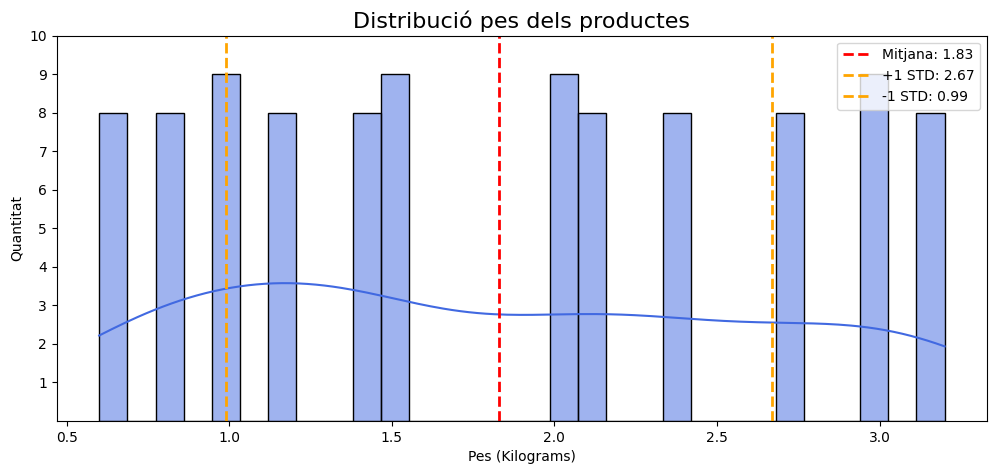

count     100.00
mean        1.83
std         0.84
min         0.60
25%         1.15
50%         1.75
75%         2.48
max         3.20
mode        1.00
median      1.75
range       2.60
Name: weight, dtype: float64


In [4]:
# Establir la connexió
conn = connection()

# Cursor per executar consultes 
cursor = conn.cursor()

# Definir la consulta per obtenir la llista de taules de la base de dades
cursor.execute("SELECT weight FROM products")
rows = cursor.fetchall()

# Convertir les dades en DataFrame de Pandas per facilitar l'anàlisi
dataframe = pd.DataFrame(rows, columns=['weight'])

# Tancar el cursor
cursor.close()

# Tancar connexió
conn.close()

# Convertir la columna 'weight' a float
dataframe['weight'] = dataframe['weight'].astype(float)

# Obtenir estadístiques descriptives
stats = dataframe['weight'].describe().round(2)
mean_weight = stats['mean']
std_weight = stats['std']

# Calcular la moda, la mediana i el rang
mode_weight = dataframe['weight'].mode()[0]  # La moda pot tenir més d'un valor, seleccionem el primer
median_weight = dataframe['weight'].median()
range_weight = dataframe['weight'].max() - dataframe['weight'].min()

# Agregar la moda, mediana y rang a les estadístiques descriptives
stats['mode'] = round(mode_weight, 2)
stats['median'] = round(median_weight, 2)
stats['range'] = round(range_weight, 2)

# Comprova si la columna 'weight' existeix
if 'weight' in dataframe.columns:

    # Crear la figura
    plt.figure(figsize=(12, 5))

    # Crear l'histograma
    sns.histplot(data=dataframe, x="weight", bins=30, kde=True, color='royalblue', edgecolor='black')

    # Afegir línies verticals per a la mitjana i la desviació estàndard
    plt.axvline(mean_weight, color='red', linestyle='dashed', linewidth=2, label=f'Mitjana: {mean_weight:.2f}')
    plt.axvline(mean_weight + std_weight, color='orange', linestyle='dashed', linewidth=2, label=f'+1 STD: {mean_weight + std_weight:.2f}')
    plt.axvline(mean_weight - std_weight, color='orange', linestyle='dashed', linewidth=2, label=f'-1 STD: {mean_weight - std_weight:.2f}')

    # Configurar les etiquetes i el títol dels eixos
    plt.title('Distribució pes dels productes', fontsize=16)
    plt.xlabel('Pes (Kilograms)')
    plt.ylabel('Quantitat')

    # Modificar les etiquetes de l'eix Y per intervals específics 
    plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

    # Col·locar la llegenda a la part superior dreta
    plt.legend(loc='upper right')

    # Mostrar la visualització
    plt.show()

    print(stats)
    
else:
    print("La columna 'weight' no exsisteix a la taula 'products'.")

Obtenim un histograma amb la distribució de la variable pes i un 'print' amb els estadísitics descriptius. Les estadístiques ens ajuden a entendre millor la distribució del pes dels productes, indicant on es troba la majoria dels pesos en relació amb la mitjana i com es dispersen aquests pesos.

Observem que el pes es mou entre els 0.60 kg i els 3.20 kg (hem suposat que la mesura de pes és en Kilograms). El rang, que és la diferència entre el valor màxim i mínim, és doncs de **2.60 kg**.

Tenim 100 productes i la mitjana de pes és de **1.83 kg** (marcat en el gràfic amb una línia vermella) en comparació a la mediana que és de **1.75 kg**. Recordem que un dels avantatges de la mediana és que es veu menys afectada pels valors atípics i les dades esbiaixades. Les línies de color taronja ens marquen la Desviació Estàndard (STD), que mesura la variabilitat en els pesos. La STD és de 0.84 kg, la +1 STD representa la mitjana més la STD (1.83+0.84) i la -1 STD se li resta la STD (1.83-0.84). Així doncs, la majoria dels productes tenen un pes que està entre 0.99 kg i 2.67 kg. En el gràfic d'histograma, les línies verticals a 1.83 kg (mitjana), 2.67 kg (+1 STD) i 0.99 kg (-1 STD) ajuden a visualitzar on es troba la major part de la distribució dels pesos.

Les barres dels gràfics mostren que pesos es distribueixen de manera força uniforme, **tenim entre 8 i 9 per cada rang de cada pes**. La línia representada de color blau és l'estimació de Densitat de Kernel (KDE) i ens mostra preecisament aquesta tendència. Representa la distribució del pes dels productes mitjançant una corba suau. Així doncs veiem que els pesos es disbtribueixen de manera força uniforme, tenint una major concentració on la corba és més alta i menys concentració on és més baixa. 

He vist interessant analitzar aquesta variable, ja que el pes és molt rellevant alhora de tenir en compte els costos de producció i la logísitca. Conèixer com influeixen els diferents pesos en el cost de producció i tenirlos en compte en els costos d'enviament i emmagatzematge permet a l'empresa prendre decisions molt més informades alhora de triar estratègies de preus i rentabilitat de cada producte.

També és important alhora d'optimitzar inventaris per la capacitat d'emmagatzematge i alhora de planificar la reposició d'stock, i per conèixer la rentabilitat dels productes en relació al seu pes. Ens pot ser de gran ajuda, alhora de refinar estratègies d'inventari. Conèixer la distribució dels pesos per optimitzar la gestió d'inventaris, assegurant una disponibilitat de manera equilibrada dels productes de cada rang de pes.

Vist això, si ens interessa indagar més sobre aquesta variable, podríem considerar combinar l'anàlisi del pes amb altres dades com el seu preu i la quantitat de transaccions per tenir una imatge més completa. Com veurem més endavant.

## Exercici 2

**Dues variables numèriques**

En aquest cas, mantenim la variable pes i li afegim una segona variable numèrica que és el preu. Ho visualitzarem amb un scatterplot o diagrama de dispersió per tal de mostra la relació entre aquestes dues variables numèriques. També mostrarem el càlcul del coeficient de correlació, que mesura la relació lineal.

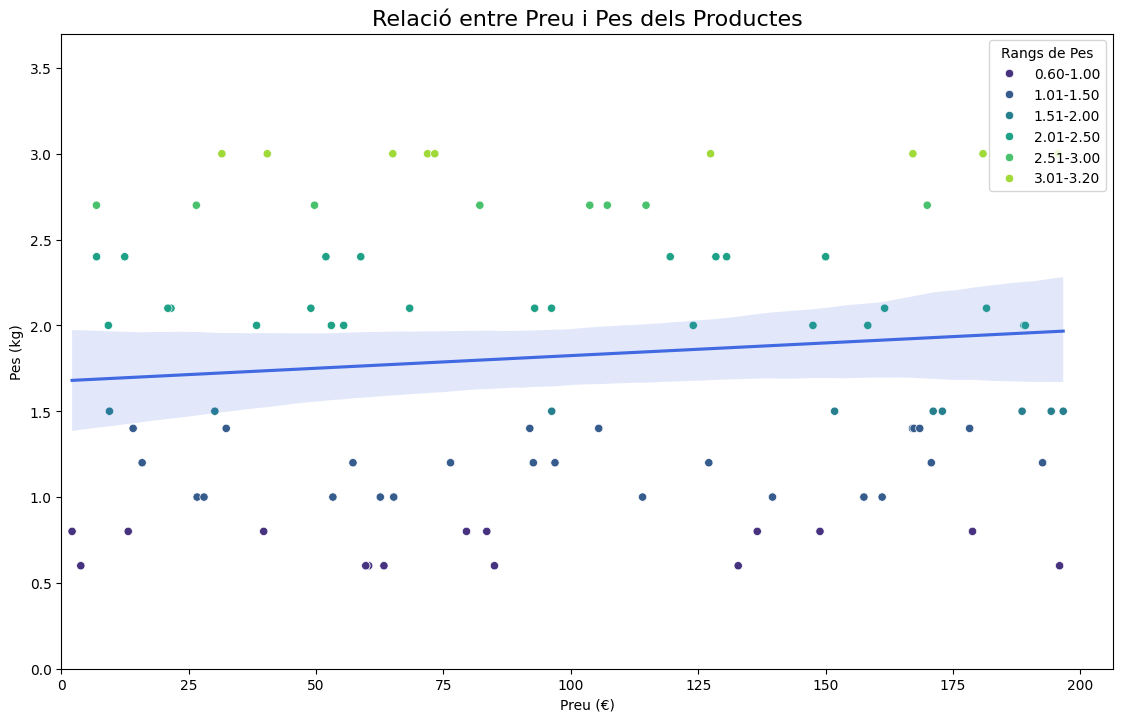

Coeficient de correlacció de Pearson: 0.11
Mitjana de pes per rang de pes:
weight_range
(0.6, 1.0]       86.0572
(1.0, 1.5]      118.6344
(1.5, 2.0]    107.113333
(2.0, 2.5]      84.42875
(2.5, 3.0]     94.954706
(3.0, 3.2]        144.29
Name: price, dtype: object


In [9]:
#Establir la connexió
conn = connection()

# Cursor per executar consultes 
cursor = conn.cursor()

# Definir la consulta SQL que obté les dades preu i pes del productes
cursor.execute("SELECT price, weight FROM products")

# Obtenir els resultats de la consulta
rows = cursor.fetchall()
dataframe = pd.DataFrame(rows, columns=['price', 'weight'])

# Calcular la correlació 
correlation = dataframe['weight'].corr(dataframe['price'])

# Crear una nova columna que classifica el pes per intervals
dataframe['weight_range'] = pd.cut(dataframe['weight'], bins=[0.6, 1.0, 1.5, 2.0, 2.5, 3.0, 3.2])

# Només es mostren les combinacions de categories que tenen dades
grouped = dataframe.groupby('weight_range', observed=True)['price'].mean()

# Tancar el cursor
cursor.close()

# Tancar la connexió
conn.close()

# Verificar si les columnas 'price' i 'weight' existeixen en el DataFrame
if 'price' in dataframe.columns and 'weight' in dataframe.columns:

    # Convertir les columnes a float
    dataframe['price'] = dataframe['price'].astype(float)
    dataframe['weight'] = dataframe['weight'].astype(float)

    # Agregar una columna pels rangs de pes
    bins = [0.60, 1.00, 1.50, 2.00, 2.50, 3.00, 3.20]
    labels = ['0.60-1.00', '1.01-1.50', '1.51-2.00', '2.01-2.50', '2.51-3.00', '3.01-3.20']
    dataframe['weight_range'] = pd.cut(dataframe['weight'], bins=bins, labels=labels, right=False)

    # Crear la figura
    plt.figure(figsize=(12, 8))

    # Crear el gràfic de dispersió amb una línia de regressió
    ax = sns.scatterplot(x=dataframe['price'], y=dataframe['weight'], hue=dataframe['weight_range'], palette='viridis')
    sns.regplot(x='price', y='weight', data=dataframe, scatter=False, ax=ax, color='royalblue')

    # Configurar les etiquetes dels eixos i el títol
    plt.title('Relació entre Preu i Pes dels Productes', fontsize=16)
    plt.xlabel('Preu (€)')
    plt.ylabel('Pes (kg)')

    # Establir els límits de l'eix Y perquè comenci a 0
    plt.ylim(0, dataframe['weight'].max() + 0.5)
    plt.xlim(0)

    # Col·locar la llegenda
    plt.legend(title='Rangs de Pes', loc='upper right')

    # Afegir un marge al voltant de la figura
    plt.gcf().set_facecolor('white')
    plt.gcf().tight_layout(pad=3.5)

    # Mostrar el gràfic
    plt.show()

    print(f"Coeficient de correlacció de Pearson: {correlation:.2f}")
    print("Mitjana de pes per rang de pes:")
    print(grouped)
else:
    print("Las columnas 'price' y/o 'weight' no existen en la tabla 'products'.")

El coeficiente de correlació de Pearson, pintat just a sota del gràfic, mostra un valor de **0.11**, el que indica que hi ha una lleu correlació lineal positiva entre el pes i el preu. Com que es tracta d'una correalació tant dèbil no podem considerar que sigui rellevant. Cada rang de pes té un color diferent.

També mostrem la mitjana dels preus dels productes agrupats per rangs de pes. Això és important perquè reforça que no hi ha una relació lineal clara entre les variables, ja que en alguns intervals, com el de (1.0, 1.5] veiem que la mitjana de preus és més alta (118.63€) en comparació amb un rang de pes més gran. Si la mitjana de preus varia significativament entre els diferents intervals de pes, suggereix que altres factors, a més del pes, poden estar influint en la determinació dels preus dels productes.

Aquesta interpretació de les dades pot indicar que probablement tenen una major influència en el preu dels productes altres factors. Aquests podrien ser la marca o bé les funcionalitats i caracterísitiques específiques, per exemple. Amb això sabem que que el pes no té un impacte important en l'increment del producte, pel que hauriem de continuar explorar quins factors són importants.

Com anàlisi adicional podríem explorar més a fons la distribució de preus dins de cada rang de pes i examinar si hi ha correlacions amb altres variables, com ara la categoria del producte o la marca, per obtenir una comprensió més completa dels determinants del preu de els productes.

## Exercici 3

**Una variable categòrica**

Trio com a variable categòrica el color dels productes i per la visualització un diagrama de barres per tal de veure la quantitat de productes de cada color. 
Un diagrama de barres mostra la relació entre una variable numèrica i una categòrica. Cada entitat de la variable categòrica es representa com una barra. L'alçada de la barra representa el seu valor numèric.
Analitzo la variable 'colour' perquè penso que ens pots ajudar a comprendre quin tipus de producte venem.

     colour  count
0   #919191      4
1   #2b2b2b      4
2   #848484      3
3   #666666      3
4   #b7b7b7      3
..      ...    ...
59  #707070      1
60  #d8d8d8      1
61  #262626      1
62  #cccccc      1
63  #bcbcbc      1

[64 rows x 2 columns]


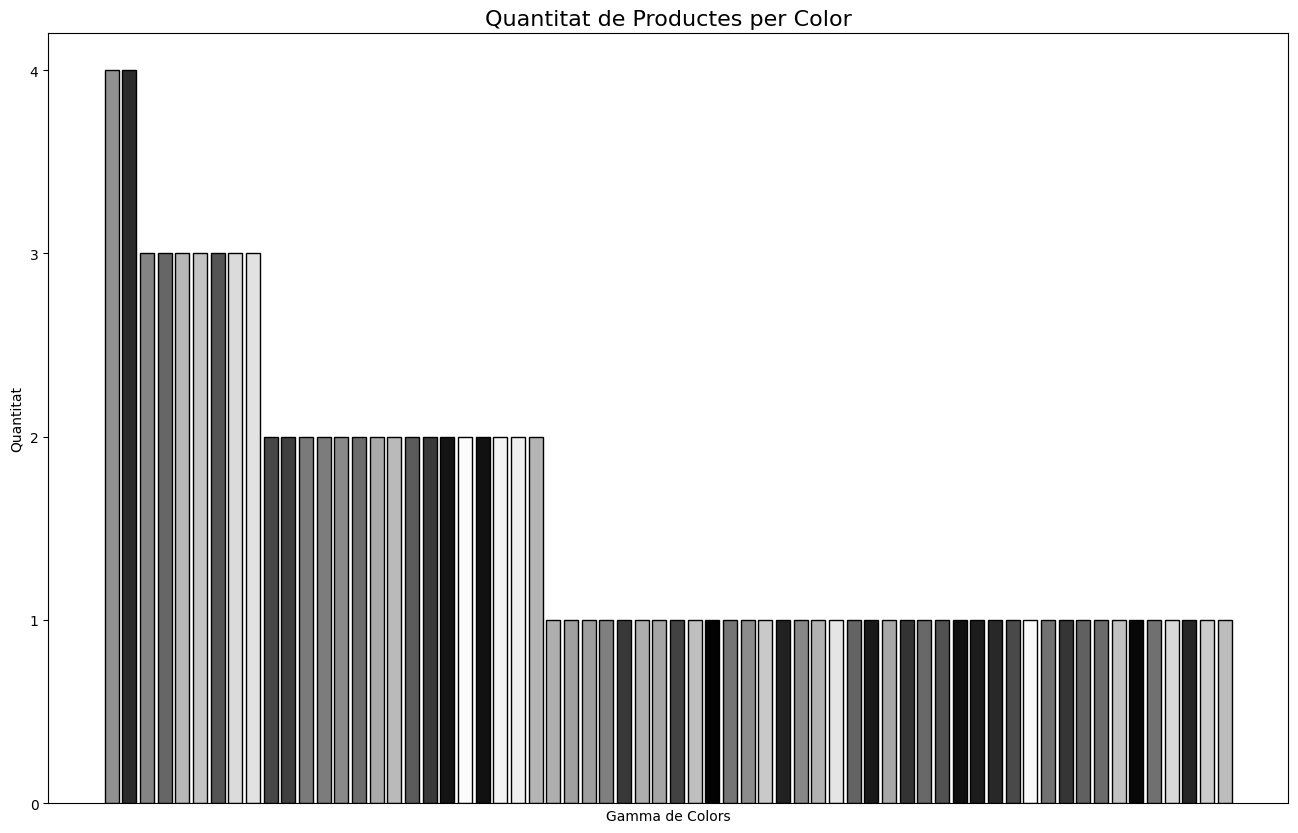

Estadístics descriptius:
count    64.00
mean      1.56
std       0.81
min       1.00
25%       1.00
50%       1.00
75%       2.00
max       4.00
Name: count, dtype: float64


In [40]:
# Establir la connexió
conn = connection()

# Crear un objecte cursor per executar consultes SQL
cursor = conn.cursor()

# Definir la consulta SQL per obtenir els colors i les seves ocurrències
cursor.execute("""
SELECT DISTINCT colour, count(*) as count
FROM products
GROUP BY colour
ORDER BY count DESC;
""")

# Obtenir tots els resultats de la consulta
results = cursor.fetchall()

# Tancar el cursor després d'obtenir els resultats
cursor.close()
conn.close()

# Establir l'estil del gràfic 
plt.style.use('default')  

# Crear un DataFrame a partir dels resultats obtinguts
df = pd.DataFrame(results, columns=['colour', 'count'])

# Mostrar el DataFrame per verificar les dades
print(df)

# Crear el gràfic de barres amb colors personalitzats
plt.figure(figsize=(16, 10))
bars = plt.bar(df['colour'], df['count'], color=df['colour'], edgecolor='black')

# Afegir etiquetes i títol
plt.xlabel('Gamma de Colors')
plt.ylabel('Quantitat')
plt.title('Quantitat de Productes per Color', fontsize=16)

# Configurar les etiquetes de l'eix Y sense decimals
plt.yticks(range(0, int(df['count'].max()) + 1))

# Ocultar les etiquetes de l'eix X
plt.xticks([])

# Mostrar el gràfic
plt.show()

# Suposant que df és el DataFrame amb les dades obtingudes de la consulta SQL
# Calcular estadístics descriptius
stats = df['count'].describe().round(2)

# Calcular la mediana
median_count = df['count'].median()

# Calcular la desviació estàndard
std_count = df['count'].std().round(2)

# Calcular el màxim i el mínim
max_count = df['count'].max()
min_count = df['count'].min()

# Calcular alguns quantils específics (25%, 50%, 75%)
quantiles = df['count'].quantile([0.25, 0.5, 0.75]).round(2)

# Mostrar els estadístics descriptius
print("Estadístics descriptius:")
print(stats)

El primer que observem i que ens cridar més l'atenció, és que els diferents codis de color hexadecimals de la taula 'products' pertanyen a 64 tons de gris. Si esperàvem veure l'arc de Sant Martí no és el cas. Això indica una diversitat considerable de tonalitats de gris.

Un anàlisi descriptiu més detallat ens mostra que mitjana del nombre de productes per color gris és de 1.56, amb una desviació estàndard de 0.81. Això suggereix que hi ha una dispersió moderada respecte a la mitjana, indicant que alguns tons de gris poden ser més populars o freqüents que d'altres. La quantitat màxima de productes d'un mateix color de gris és 4, mentre que la mínima és 1. Podem cloure, doncs, certa variabilitat, ja que no és hi ha una distribució d'quests colors entre els 100 productes.

Fiablment, els quantils ens diuen que el 25% dels colors de gris tenen una quantitat d'1 producte, el 50% (mediana) té 1 producte i el 75% tenen 2 productes. Això reflecteix una distribució que es concentra principalment en colors de gris amb quantitats baixes, mentre que uns pocs colors de gris tenen quantitats més elevades.

A mode de conclusió, oferim una gamma de productes amb una àmplia varietat de tonalitats de gris per escollir. Encara que observem una mitjana de 1.56 productes per color, hi ha una dispersió significativa amb alguns tons de gris que tenen molts productes, fins a 4, i altres que en tenen només 1. El que pot reflectir tendències de demanda diverses o preferències dels clients per certes tonalitats.

Amb aquesta informació de base, podríem analitzar quins tons de gris són els que es venen més i quins es venen menys, per tal d'aplicar d'ampliar la gamma de productes en aquestes tonalitats específiques o desenvolupar variants de productes que incorporen aquests colors més demandats. De la mateixa manera, es podria ajudar a detectar patrons específics en les preferències de color entre segments de clients per regions geogràfiques i edat (informació de la qual disposem), per personalitzar les ofertes i atendre millor les necessitats de cada 'customer persona'. En qualsevol cas, tindria molta més utilitat analitzar aquesta variable, creuant-la amb altres, i aplicar-ho a estratègies de màrqueting o de planificació de la producció.

## Exercici 4

**Una variable categòrica i una numèrica**

Agafarem com a variable el país de les empreses i com a variable numèrica l'import (amount) de les transaccions. L'objectiu és poder comparar la distribució de les transaccions per país, i utilitzar un diagrama de caixes o 'boxplot' és una bona manera. Aquest tipus de diagrama ens facilita comparar de manera ràpida la distribució de l'import de les transaccions entre molts grups de dades (categories), en aquest cas entre 15 països, percebent d'una manera intuïtiva la mitjana, la dispersió de les dades i la seva simetria. En cas d'observar-se un biaix a les dades també podrem identificar en quina direcció es produeix aquest biaix. 

Veiem-ho:

country
Australia          12
Belgium            13
Canada             61
China               3
France              6
Germany           118
Ireland            62
Italy              17
Netherlands        18
New Zealand        11
Norway             68
Spain               2
Sweden             79
United Kingdom    100
United States      17
dtype: int64


/var/folders/bq/gwwghf997q74ydx2r6mhgd2h0000gp/T/ipykernel_40835/4280121078.py:68: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 3
  plt.legend(handles=handles, labels=['Baixa', 'Mitja', 'Alta'], title='Variabilitat', loc='upper left')


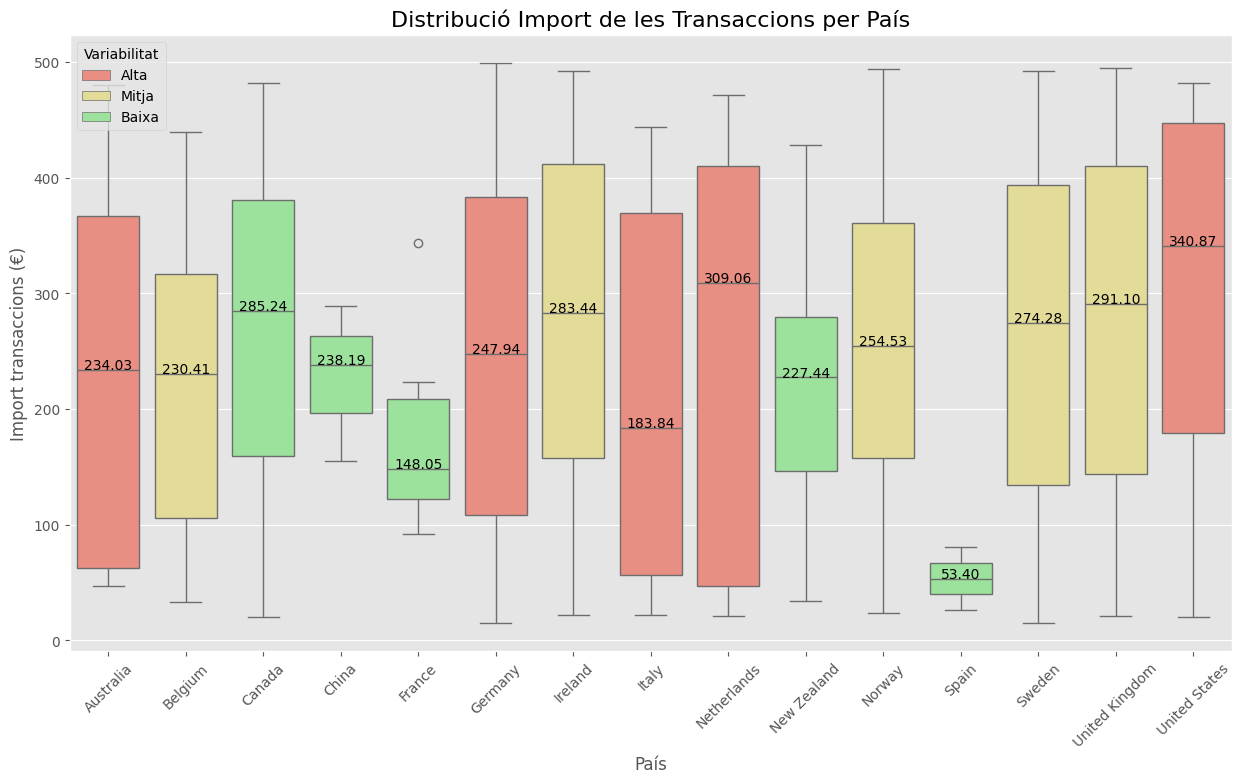

country
Australia         234.035
Belgium            230.41
Canada             285.24
China              238.19
France            148.045
Germany           247.935
Ireland           283.445
Italy              183.84
Netherlands       309.065
New Zealand        227.44
Norway             254.53
Spain                53.4
Sweden             274.28
United Kingdom      291.1
United States      340.87
Name: amount, dtype: object
Desviació estàndard per país:
country
Australia         162.789664
Belgium           141.983942
Canada            131.335128
China              67.431749
France             92.285542
Germany           149.658844
Ireland           139.819171
Italy             154.779715
Netherlands       179.317567
New Zealand       127.830270
Norway            133.421060
Spain              38.438325
Sweden            143.587291
United Kingdom    145.882836
United States     160.292693
Name: amount, dtype: float64


In [73]:
# Establir la connexió
conn = connection()

# Crear un objecte cursor per executar consultes SQL
cursor = conn.cursor()

# Executar la consulta SQL
cursor.execute("""
SELECT t.amount, c.country
FROM transactions t
INNER JOIN companies c ON t.business_id = c.company_id
ORDER BY country
""")

# Obtenir tots els resultats de la consulta
results = cursor.fetchall()

# Tancar el cursor després d'obtenir els resultats
cursor.close()
conn.close()

# Establir l'estil del gràfic 
plt.style.use('ggplot')  

# Convertir els resultats a un DataFrame de pandas
df = pd.DataFrame(results, columns=['amount', 'country'])

# Imprimir el recompte de transaccions per país
transaction_counts = df.groupby('country').size()
print(transaction_counts)

# Calcular la desviació estàndard per país
std_devs = df.groupby('country')['amount'].std()

# Definir els llindars per categoritzar la variabilitat
low_threshold = std_devs.quantile(0.33)
high_threshold = std_devs.quantile(0.66)

# Crear una nova columna per a les categories de variabilitat
df['variability'] = df['country'].apply(lambda x: 'Baixa' if std_devs[x] <= low_threshold else ('Mitja' if std_devs[x] <= high_threshold else 'Alta'))

# Definir la paleta de colors
palette = {'Baixa': 'lightgreen', 'Mitja': 'khaki', 'Alta': 'salmon'}

# Crear el boxplot amb colors personalitzats
plt.figure(figsize=(15, 8))

# Assegurar-se que els països s'ordenen correctament en el DataFrame
order = df['country'].unique()
sns.boxplot(x='country', y='amount', hue='variability', data=df, order=order, palette=palette, dodge=False)

# Afegir etiquetes de mediana al boxplot
medians = df.groupby('country')['amount'].median()
for tick, label in enumerate(order):
    plt.text(tick, medians[label] + 0.5, f"{medians[label]:.2f}", 
             horizontalalignment='center', size='medium', color='black')

# Configurar etiquetes dels eixos i títol
plt.title('Distribució Import de les Transaccions per País', fontsize=16)
plt.xlabel('País')
plt.ylabel('Import transaccions (€)')

# Rotar les etiquetes de l'eix X per millorar la llegibilitat
plt.xticks(rotation=45)

# Afegir la llegenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Baixa', 'Mitja', 'Alta'], title='Variabilitat', loc='upper left')

# Mostrar el gràfic
plt.show()

# Imprimir les mitjanes de l'import
print(medians)

# Mostrar la desviació estàndard per cada país
print("Desviació estàndard per país:")
print(std_devs)

Els diagrames 'boxplot' o diagrames de caixes ens mostren la distribució de l'import de les transaccions mitjançant quartils. El número que apareix just a sobre de la línia del centre de la caixa és la mediana, que divideix les dades en dos parts iguals: 
Les línies fora de la caixa, indiquen la variabilitat fora dels cuartils.
Adicionalment, hem creat una nova columna anomenada 'variability' que basant-se amb la desviació estandàrd, classifica els països en 3 categories: Variabilitat baixa (color salmó), mitja (color groc) i alta (color verd).

Recordem que la desviació estàndard és una mesura d'extensió o variabilitat a l'estadística descriptiva i s'utilitza per calcular la variació o dispersió en què els punts de dades individuals difereixen de la mitjana. Una desviació baixa indica que els punts de dades estan molt a prop de la mitjana, mentre que una desviació alta mostra que les dades estan disperses en un rang més gran de valors. Així doncs, segons la nostra classificació observem que:

* Països amb Alta variabilitat: Austràlia, Alemanya, Itàlia, Païso Baixos i Estats Units.

* Països amb Mitja variabilitat: Bèlgica, Irlanda, Noruega, Suècia i Regene Unit.

* Països amb Baixa variabilitat: Canadà, Xina, França, Nova Zelanda i Espanya.

Pel que fa la simetria de distribució, observem que ho és molt simètrica en el cas de Almemanya, Noruega i Espanya. En canvi hi ha una distribució asimètrica negativa a Austràlia, Itàlia i Països Baixos. Fent que la mitjana sigui menor que la mediana. I una distribució asimètrica positiva en la resta de països.

En làmbit del màrqueting, la desviació pot ajudar a tenir en compte la gran variació dels costos o les vendes.

La desviació estàndard també ajuda a determinar la dispersió dels preus dels actius respecte al seu preu mitjà i la volatilitat al mercat.

Trobem únicament un punt de dades únic o valor atípic a França. En mostres petites, cada dada té més pes, per tant, els valors extrems poden aparèixer com a outliers, distorsionant la representació visual del boxplot.

Considerar, però, que no podem extreure conclusions precipatades de la interpretació d'aquests resultats, ja que tenim una distribució desproporcionada de les dades originat per l'asimetria de la mostra: països com Alemanya i Regne Unit disposem d'unes 100 transaccions registrades i d'altres com Espanya i la Xina menys de 5. Auqesta diferència és molt gran. El perill de representar un nombre tant petit de transaccions pot representar incorrectament la distribució rela de les dades. Els països amb poques transaccions tindran intervals de confiança més amplis, la qual cosa dificulta la confiança en les mitjanes, medians o altres mesures estadístiques presentades. Amb tot això, ens hem de prendre les dades com una aproximació i no prendre decisions precipitades sense abans poder assegurar que les dades es aporten un nivell suficient de significació estadísitica.

Recomanaria augmentar les transaccions on les transaccions es troben per sota les 50 i en futurs anàlisis, aplicar la normalització de dades, per tal d'igualar la representació visual o filtrar les dades per excloure els països amb menys transaccions per a anàlisis més robustes.


Per tant, segons els objectius empresarials, totes aquestes dades es podrien aplicar per intentar augmentar les transaccions en països amb la quantitat més baixa registrada, augmentar les transaccions significa prendre com a referència a les estratègies comercials d’un altre país, etc.

## Exercici 5

**Dues variables categòriques**

Agafem com a variables categòriques: 'country' de companies i 'declined' de transactions. Mostrarem mitjançant un diagrama de xarxa o 'spider chart' les transaccions declinades per país, ja que ens permet comparar fàcilment el total de declinacions de cada país de manera simultània, identificant quins països tenen més transaccions declinades en relació amb altres. 

L'objectiu és detectar patrons i/o anomalies per facilitar la presa de decisions davant d'aquests resultats.

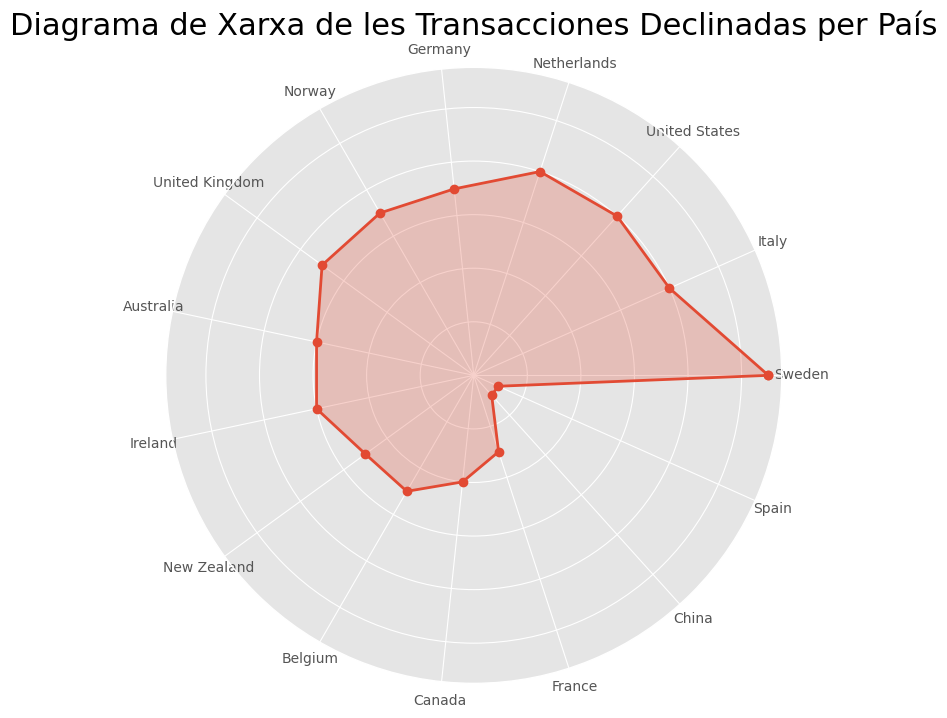

Mitjana de transacciones declinadas: 5.8


In [99]:
# Establecer conexión
conn = connection()

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

# Ejecutar la consulta SQL
cursor.execute("""
SELECT c.country, COUNT(t.declined) AS declined_count
FROM transactions t
INNER JOIN companies c ON t.business_id = c.company_id
WHERE t.declined = 1
GROUP BY c.country
""")

# Obtener todos los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor después de obtener los resultados
cursor.close()
conn.close()

# Establecer el estilo del gráfico 
plt.style.use('ggplot')  

# Convertir los resultados en un DataFrame de pandas
df = pd.DataFrame(results, columns=['country', 'declined_count'])

# Calcular el valor medio de transacciones declinadas
mean_declined = df['declined_count'].mean()

# Ordenar los países por número de transacciones declinadas
country_counts_sorted = df.sort_values(by='declined_count', ascending=False).reset_index(drop=True)

# Crear el gráfico spider plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': 'polar'})

# Calcular el ángulo para cada país
angles = np.linspace(0, 2 * np.pi, len(country_counts_sorted), endpoint=False).tolist()

# Plotear las líneas del gráfico spider
values = country_counts_sorted['declined_count'].tolist()
values += values[:1]  # Para cerrar el gráfico
angles += angles[:1]  # Para cerrar el gráfico

ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)

# Etiquetar los países en el gráfico
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(country_counts_sorted['country'], size=10)

# Configurar el título y mostrar el gráfico
plt.title('Diagrama de Xarxa de les Transacciones Declinadas per País', size=22)
plt.show()

# Imprimir la media de transacciones declinadas
print(f"Mitjana de transacciones declinadas: {mean_declined:.1f}")

El primer que observem és que bona part dels països segueixen un mateix patró en les declinacions, 11 de 15 països es troben propers a la mitjana de transaccions declinades (5.8). Mentre que a Suècia veiem com creixen desproporcionadament fins arriba a les 11 declinacions. Per contra, Espanya, Xina i França en tenen menys que el patró general, per sota de 3. Aquestes dades ens poden portar a fer les segëunstsegüents suposicions:

* On la distribució és uniforme, pot indicar una bona implementació global dels sistemes de pagament de l'empresa.

* On hi ha un baix nombre de declinacions pot suggerir que aquests països tenen sistemes de pagament més fiables o polítiques menys restrictives.

* On hi ha un alt nombre de declinacions, com és Suècia, pot indicar problemes amb el processador de pagaments local o polítiques estrictes de les institucions financeres. 

Seria recomanable, doncs, investigar quins són els factors que realment influeixen en la quantitat de transaccions decliandes de Suècia, i tenir en compte el context complet del mercat financer i les polítiquess locals, alhora de prendre decisions d'expansió del negoci a nous països.

## Exercici 6

**Tres variables** 

Per aquest exercici hem seleccionat dues variables numèriques i una categòrica. Les variables són: 'amount' de transactions, 'country' de users i 'age'. Aquesta última variable l'haurem de calcular prèviament.
L'objectiu és observar si hi ha cap relació entre aquestes tres variables mitjançant la visualització d'un gràfic d'àrees apilades. Esperem veure com es distribueix la mitjana de l'amount en funció de l'edat dels usuaris i el país de residència, per indetificar patrons i comparar tendències entre diferents grups demogràfics i geogràfics.

Aquest gràfic d'àrees l'hem d'interpretar de la següent manera: en l'eix X es veuen representada les edats dels usuaris que van dels 23 als 45 anys. 

En l'eix Y es mostra la mitjana de l'import de les transaccions per cada grup d'edat i país.

/var/folders/bq/gwwghf997q74ydx2r6mhgd2h0000gp/T/ipykernel_40835/480333511.py:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_df = grouped_df.pivot(index='age', columns='country', values='amount').fillna(0)


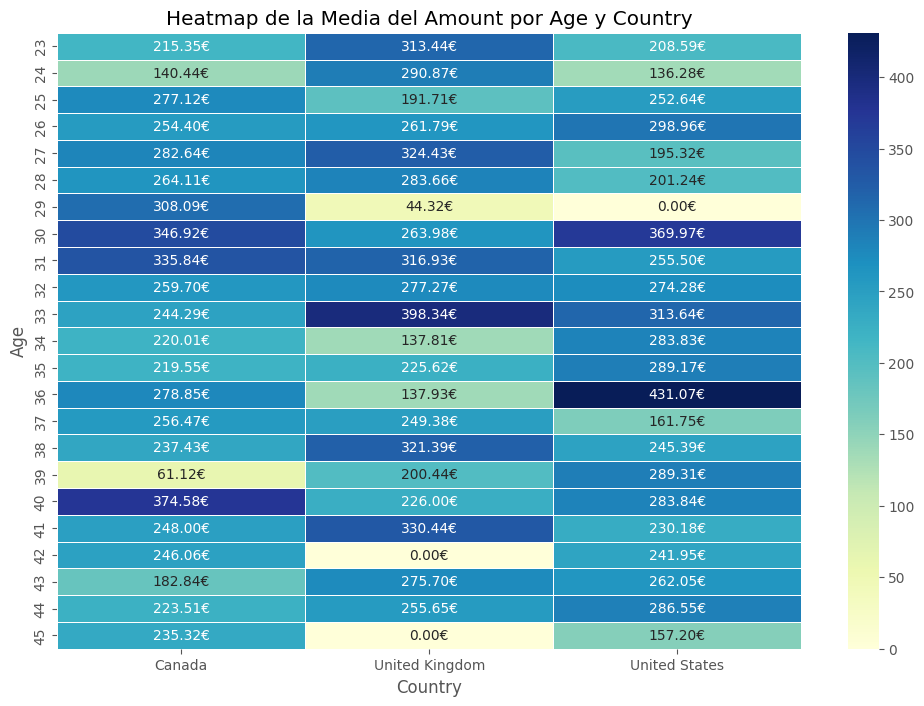

          country average_amount  average_age  total_users
0          Canada     253.559375    33.789773          352
1  United Kingdom     245.424032    32.838710           62
2   United States     267.251792    34.745665          173


In [162]:
# Importar el módulo para manipular fechas y horas
from datetime import datetime

# Establecer conexión
conn = connection()

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

# Ejecutar la consulta SQL
cursor.execute("""
SELECT t.amount, u.country, u.birth_date
FROM transactions t
JOIN users u ON u.id = t.user_id
""")

# Obtener todos los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor después de obtener los resultados
cursor.close()
conn.close()

# Convertir los resultados en un DataFrame de pandas
df = pd.DataFrame(results, columns=['amount', 'country', 'birth_date'])

# Calcular la edad a partir de la fecha de nacimiento
df['birth_date'] = pd.to_datetime(df['birth_date'])  # Asegurarse de que la fecha de nacimiento es de tipo datetime
df['age'] = df['birth_date'].apply(lambda x: (datetime.now() - x).days // 365)

# Agrupar por país y edad, y calcular la media del amount
grouped_df = df.groupby(['country', 'age']).agg({'amount': 'mean'}).reset_index()

# Crear una tabla pivote para el heatmap
pivot_df = grouped_df.pivot(index='age', columns='country', values='amount').fillna(0)

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)

# Añadir el símbolo de € a las anotaciones
for text in plt.gca().texts:
    value = text.get_text()
    if value != 'nan':
        text.set_text(f'{value}€')

plt.title('Heatmap de la Media del Amount por Age y Country')
plt.xlabel('Country')
plt.ylabel('Age')
plt.show()

# Calcular e imprimir el total de usuarios por país, la media de edad y la media de amount
user_stats = df.groupby('country').agg({
    'amount': 'mean',
    'age': 'mean',
    'country': 'count'
}).rename(columns={'country': 'total_users', 'amount': 'average_amount', 'age': 'average_age'}).reset_index()

print(user_stats)


Aquest mapa de calor, s'ha d'intepretar tenint en compte que a l'eix X trobem representats els 3 països: Canadà, Estats Units i Regne Unit. I en l'eix Y tenim les diferents edats dels usuaris, que van dels 23 als 45 anys. Al costat dret del gràfic tenim la llegenda per intepretar els diferents colors. El color canvia en funció de la mitjana de l'amount, els tons més foscos (verd i blau) apunten a una mitjana més alta, i els tons més clars (groc) són els que tenen una mitjana més baixa. Per últim, com es pot intuïr a cada cel·la hi podem llegir la mitjana de l'amount per cada combinació de país i edat.

Pel que fa la mitjana d'edat dels usuaris de cada país, tenim que Estats Units té la mitjana d'edat més alta amb 34,7 anys, desprès ve Canadà amb 33,7 i finalment Regne Unit amb 32,8. Tampoc observem grans diferències en aquest cas. Hem afegit el nombre total d'usuaris per país perquè no és el mateix extreure conclusions amb una mostra més gran o més petita.



Dit això, el que observem és que no es veu una tendència general on certs grups d'edat tendeixin a fer transaccions amb un amount més alt o més baix, ni grans diferències entre països, de fet ho podem veure en el print de 'users_stats' on la mitjana de l'import no varia molt significativament. 

D'altra banda, sí que podem intuïr patrons més específics, on certs grups d'edat en determinats països tendeixen a tenir transaccions més elevades i en d'altres més baixes. Veiem-ho:

* Canadà troba la seva mitjana més alta en els 40 anys amb 374,58€ i la franja de 29 a 31 anys també es manté alta, per sobre del 300€. Per contra, troba la seva mitjana més baixa amb 61,12€ just un any abans del seu màxim, als 39 anys. Els 24 anys també té una mitjana baixa de 140,44€.

* A Regne Unit, els usuaris que gasten més de mitjana són els de 33 anys amb 398,34€ i el segueixen amb mitjanes també altes els grups de 41, 38, 31, 27 i 23. Tenim un gap amb el grup de 42 i 45 anys ja que no han fet cap transacció. El grup d'edat que gasta menys són els de 29 anys amb 44,32€, i els de 34 i 36 tenen una mitjana de 137€ aprox. 

* A Estats Units hi trobem els usuaris amb una mitjana general més alta i el grup d'edat estrella és el de 36 anys amb una mitjana 431,07€ i els de 30 amb 369,97€. No es té mercat amb el grup de 29 anys i una mitjana baixa d'amount amb els de 25, 45, 27 i 37 per sota del 200€.

Amb aquestes dades podem concloure que s'han indetificat diferents patrons despesa. Hi ha grups amb alt i baix rendiment pel que fa la mitjana de transaccions, pel que utilitzar la segmentació per edat i país alhora d'enfocar les estratèges de marketing podria ser molt rentable. També ens podríem plantejar implementar programes d'afiliació i retenció per als grups d'edat que mostren les mitges més altes de despesa i oferir promocions especials en moments clau (per exemple, aniversaris, aniversaris de registre, etc).

En definitiva, aplicar qualsevol estratègia que ajudi a maximitzar el valor del client, augmentar l'afiliació i retenció, i obtenir el màxim retorn de la inversió.

En resumen, el heatmap junto con las estadísticas te ofrece una comprensión visual y cuantitativa de cómo varían las transacciones por edad y país. Esto puede ser útil para identificar mercados específicos, tendencias de gasto y posibles oportunidades de negocio.

## Exercici 7
**Graficar un Pairplot**

Pairplot a Seaborn és una eina de visualització de dades que crea una matriu de diagrames de dispersió, que mostra relacions per parells entre variables en un conjunt de dades, cosa que ajuda a visualitzar correlacions i distribucions.

Volem analitzarobservar quines relacions trobem entre la mitjana de l'import, el pes i el preus dels productes pels diferents països.

Amb aquestes variables, podem explorar si hi ha alguna relació entre el preu i el pes dels productes, així com veure com aquestes característiques afecten la quantitat de la transacció.

Un diagrama de parells visualitza les relacions entre parells de variables en un conjunt de dades mitjançant diagrames de dispersió i histogrames.
El propòsit és explorar patrons, correlacions i distribucions entre múltiples variables de manera concisa i completa.

El pairplot que has creat permet examinar les relacions entre average_amount, weight i price, amb els països com a variables categòriques (representades per diferents colors). Aquí tens algunes anàlisis clau que pots fer amb aquest gràfic:

Ara, el codi hauria de generar un pairplot amb una mostra aleatòria de 62 registres per país i mostrar la taula de mitjana de l'amount per país sense mostrar advertències de deprecació. Assegura't de substituir les credencials de connexió (host, user, password, database) segons la teva configuració específica de MySQL.

Hem decidit fer això, perquè el nombre de transaccions per cada país té proporcions molt diferents: Canadà 352, USA 173 i UK 62 registres.

/var/folders/bq/gwwghf997q74ydx2r6mhgd2h0000gp/T/ipykernel_40835/57767819.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('country', group_keys=False).apply(lambda x: get_random_sample(x, 62))


<Figure size 1400x1000 with 0 Axes>

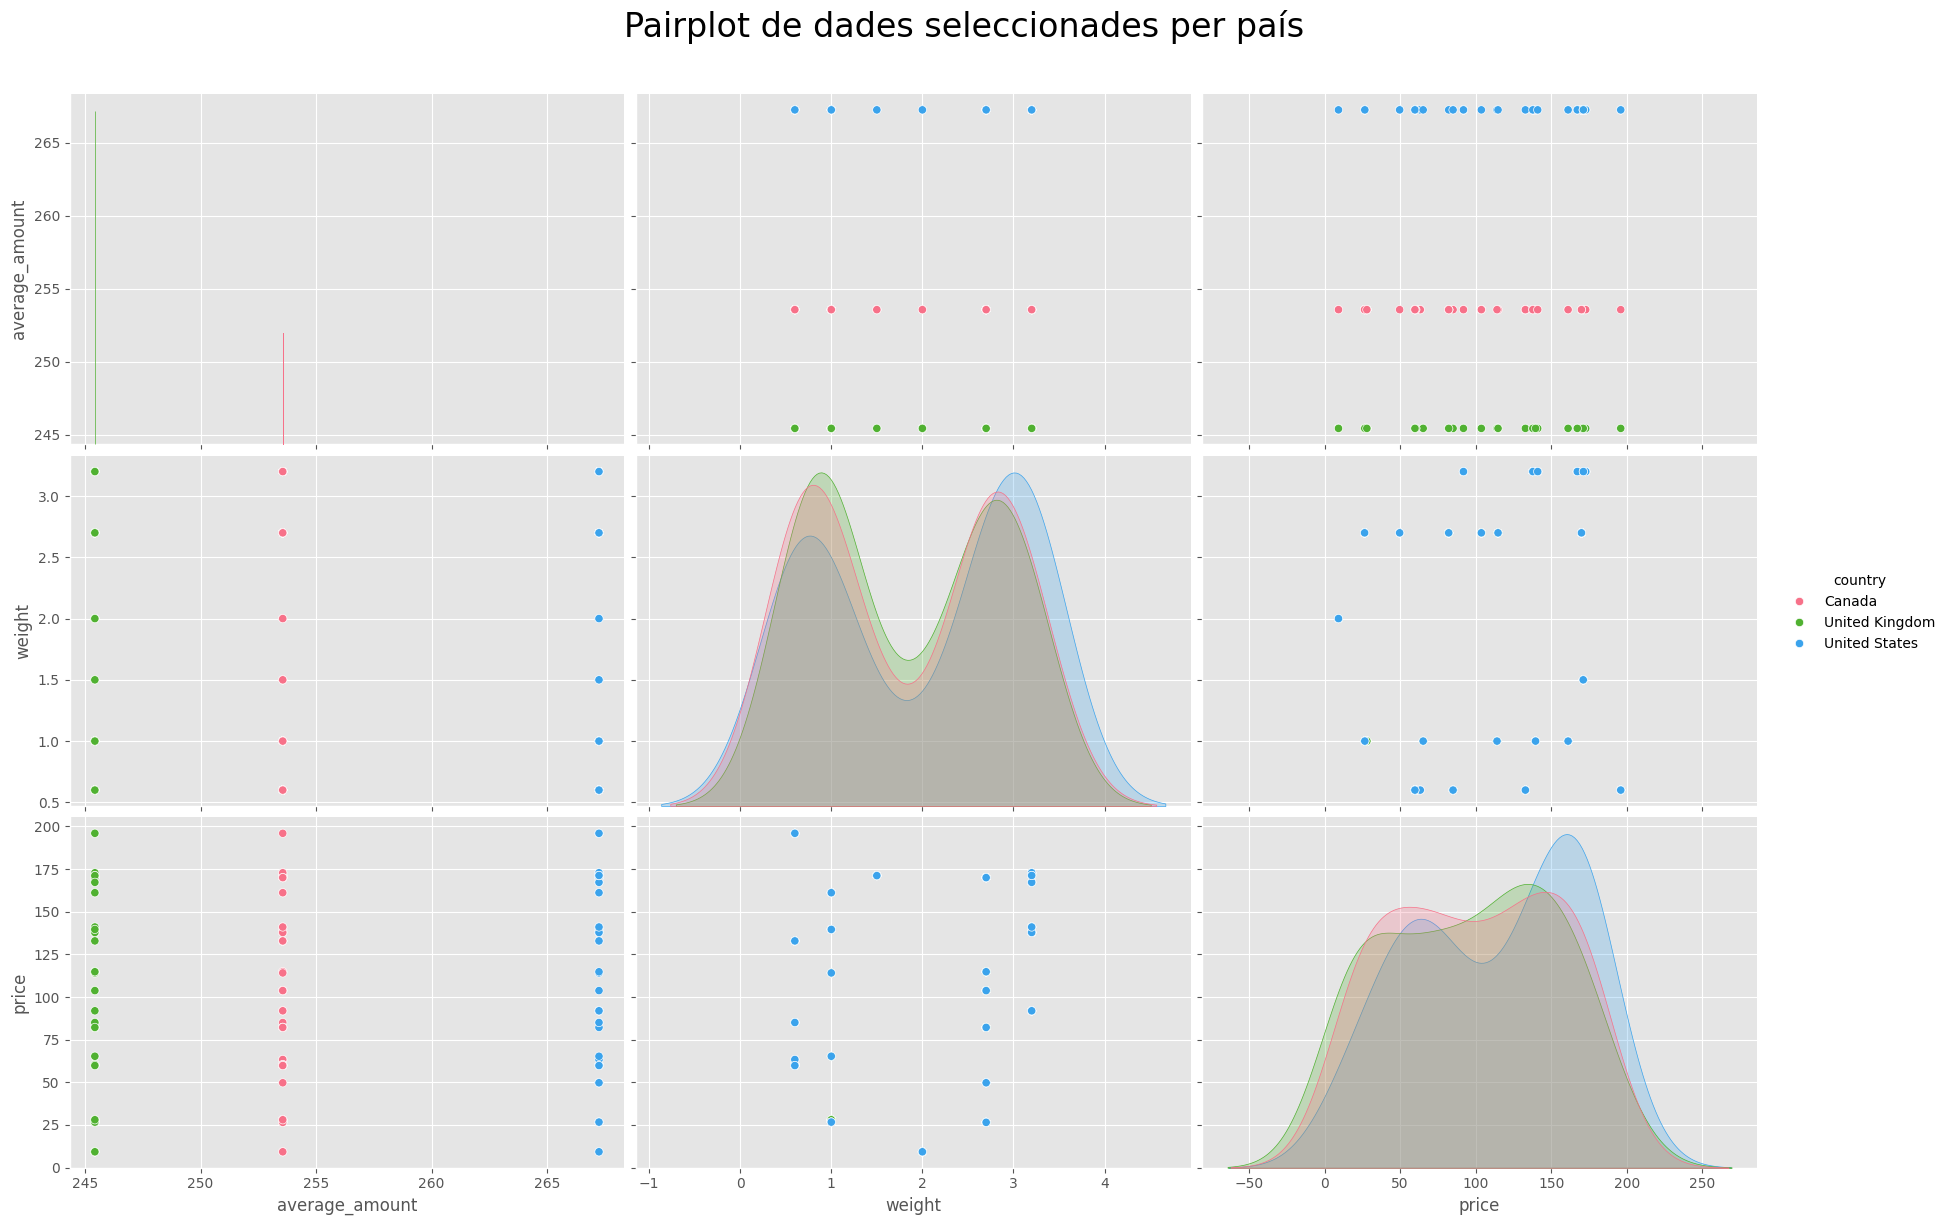

          country average_amount
0          Canada     253.559375
1  United Kingdom     245.424032
2   United States     267.251792


In [233]:
# Establir la connexió
conn = connection()

# Crear un objecte cursor per executar consultes SQL
cursor = conn.cursor()

# Consulta SQL original amb la selecció de dades
query = """
SELECT u.country, t.amount, p.weight, p.price
FROM users u
JOIN transactions t ON u.id = t.user_id
JOIN products p ON t.product_ids = p.id
"""

# Executar la consulta SQL
cursor.execute(query)

# Obtenir tots els resultats de la consulta
results = cursor.fetchall()

# Tancar el cursor i la connexió després d'obtenir els resultats
cursor.close()
conn.close()

# Convertir els resultats en un DataFrame de Pandas
df = pd.DataFrame(results, columns=['country', 'amount', 'weight', 'price'])

# Calcular la mitjana de l'amount per país
df_avg_amount = df.groupby('country')['amount'].mean().reset_index()
df_avg_amount.rename(columns={'amount': 'average_amount'}, inplace=True)

# Funció per obtenir una mostra aleatòria de 62 registres per país
def get_random_sample(df, sample_size):
    return df.sample(min(len(df), sample_size))

# Aplicar la funció per obtenir una mostra aleatòria amb 62 registres per país
df_sampled = df.groupby('country', group_keys=False).apply(lambda x: get_random_sample(x, 62))

# Unir la mitjana de l'amount amb les altres dades
df_sampled = df_sampled.merge(df_avg_amount, on='country')

# Triar les variables seleccionades per al pairplot
selected_vars = ['average_amount', 'weight', 'price']

# Configurar el gràfic
plt.figure(figsize=(14, 10))  # Ajustar la mida de la figura

# Crear el pairplot amb la tercera variable
pairplot = sns.pairplot(df_sampled, vars=selected_vars, height=4, aspect=1.5, hue='country', palette='husl')

# Afegir un títol al gràfic
pairplot.fig.suptitle("Pairplot de dades seleccionades per país", y=1.02, fontsize=24)

# Mover la llegenda a la part superior
pairplot.fig.subplots_adjust(top=0.95)  # Ajusta la posició de la llegenda a la part superior

# Mostrar el gràfic
plt.show()

# Mostrar la taula de mitjana de l'amount per país
print(df_avg_amount)



Els diferents colors identifiquen el país dels usuaris, tal i com es mostra en la llegenda situada al centre-dreta. Per interpretar el pairplot ho hem de fer la següent manera: els gràfics en diagonal mostren la distribució de cada variable individualment. Així doncs, el gràfic superior esquerre representa la mitjana de l'import dels tres països (tot i que per algun motiu la línia blava d'Estats Units no es visaulitza): Canadà amb una mitjana de 253,55€, Regne Unit 245,24€ i Estats Units la més alta amb 267,25€. El gràfic del centre mostra la distribució del pes, que ja havíem analitzat a l'exericic 1, però fent servir un gràfic de barres. Com s'observa, en agafar una mostra amb una grandària exactament igual per a cada país, la distribució del pes és molt similar entre els països. Hi ha dos pics per sota d'un kilo i pròxims al tres kilos. Tot i que Estats Units té un pic més baix en el primer i més alt en el segon. Tot i que la tendència és molt similar, sembla que Regne Unit prefereix productes de pes inferior i Estats Units superior. Per acabar amb la diagonal tenim el gràfic inferior dret amb la distribució de l'última variable, el preu. Aquí observem que els usuaris d'Estats Units, en proporció a la resta, trien de manera clara productes més cars. A més a més, trobem dos repunts en productes del voltant de 60€, fa una devallada en els de 110€ i torna a assolir el seu màxim prop del 170€. Pel que fa els usuaris de Regene Unit genera unes corbes més suaus, començant abans i assolint el primer pic als 30€ i a partir d'aquí va pujant més lleugerament fins als 140€. Pel que fa Canadà fa un primer pic passats els 50€ i el segon abans del 150€. La distribució d'aquest país és molt més compacta. Per acabar, podem concloure que hi ha més similitud entre els usuaris de Regne Unit i Canadà. Estats Units té un comportament de preus més diferenciat.

Passem a la resta dels gràfics, els que es mostren fora de la diagonal. Aquests ens ensenyen la relació entre dos variables:

* Relació mitjana de l'import i pes (gràfics superior-centre i centre-esquerra): no hi ha cap relació.

* Relació mitjana de l'import i preu (gràfics superior-dreta i inferior-esquerra): no hi ha cap relació.

* Relació pes i preu (gràfics centre-dreta i inferior-centre): no hi ha cap relació.


Els gràfics fora de la diagonal mostren la relació entre dues variables. Per exemple, el gràfic superior dret mostra la relació entre la factura total i la propina. Hi ha una correlació positiva entre aquestes dues variables, cosa que significa que els bitllets més grans tendeixen a tenir puntes més grans.


**Conclusió**

Les dades ens han mostrat que no hi ha cap correlació lineal evident entre aquestes tres variables. Pel que que un canvi en una de les variables no té perquè afectar l'altre. 
En definitiva, aquest resultat pot suggerir que la intereacció entre les variables sigui molt més complexa o es vegi afectada per altres factors que no hem considerat. Tot i que per mi la hipòtesi més plausible és que el nostre negoci disposa de poques dades per fer evidents aquest tipus de relacions. 


## NIVELL 2

## Exercici 1

**Correlació de totes les variables numèriques**

Primer localitzem totes les variables numèriques, sense transformar, de la nostra base de dades 'test'. Aquestes són el preu, pes, import de les transaccions.
Com que són només tres variables una bona manera d'observar la correlació pot ser utilitzant un gràfic de dispersió tridimensional de la llibreria matplotlib.

Aquest gràfic t'ajudarà a visualitzar com estan distribuïdes les variables weight, price i amount en un espai tridimensional, proporcionant una perspectiva visual de la seva relació.

Veiem-ho:

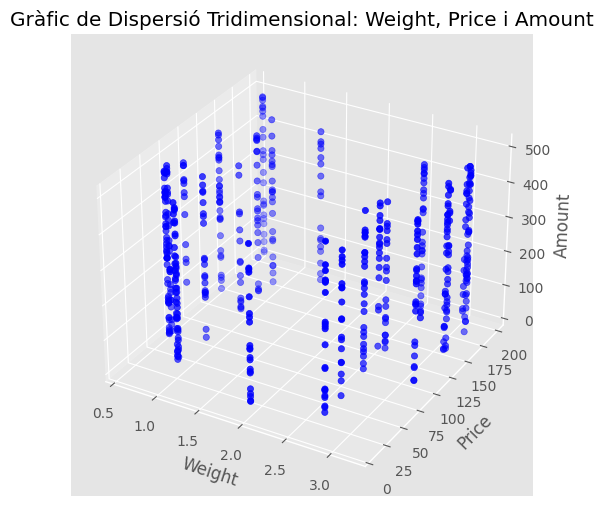

In [244]:
from mpl_toolkits.mplot3d import Axes3D

# Establir la connexió i obtenir les dades
conn = connection()

# Crear un objecte cursor per executar consultes SQL
cursor = conn.cursor()

# Consulta SQL original amb la selecció de dades
query = """
SELECT p.weight, p.price, t.amount
FROM products p
JOIN transactions t ON t.product_ids = p.id;
"""

# Executar la consulta SQL
cursor.execute(query)

# Obtenir tots els resultats de la consulta
results = cursor.fetchall()

# Tancar el cursor i la connexió després d'obtenir els resultats
cursor.close()
conn.close()

# Convertir els resultats en un DataFrame de Pandas
df = pd.DataFrame(results, columns=['weight', 'price', 'amount'])

# Convertir les columnes numèriques a tipus float per evitar errors
df['weight'] = df['weight'].astype(float)
df['price'] = df['price'].astype(float)
df['amount'] = df['amount'].astype(float)

# Crear la figura 3D
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# Extraure les variables per a l'eix x, y, z
x = df['weight']
y = df['price']
z = df['amount']

# Crear el gràfic de dispersió 3D
ax.scatter(x, y, z, c='blue', marker='o')

# Etiquetar els eixos
ax.set_xlabel('Weight')
ax.set_ylabel('Price')
ax.set_zlabel('Amount')

# Afegir un títol
ax.set_title('Gràfic de Dispersió Tridimensional: Weight, Price i Amount')

# Mostrar el gràfic
plt.show()



Hem creat un gràfic de dispersió tridimensional amb els punts que representen cada observació. Com ja hem vist amb anterioritat, ja que hem analitzat aquestes variables en altres exercicis, no es mostra cap tipus de correlació entre aquestes variables. Intentant analitzant el motiu pel qual això pot suceeir, trobem que la vegades es variables poden tenir escales molt diferents entre si, cosa que pot fer que la relació no sigui evident visualment. Alternativament podríem normalitzar o estandarditzar les variables i veure si ens mostra uns resultats diferents. O explorar altres models de regressió no lineal que mostrin millor la relació entre variables.

## Exercici 2

**Implementa un jointplot**

El jointplot de la llibreria Seaborn, permet dibuixar una gràfica de dues variables amb gràfics bivariants i univariants. Permet explorar la relació entre dos variables i obtenir les seves distribucions de manera individual. Així doncs, seleccionem les variables pertinents per mostrar la relació entre la quantitat de productes adquits en cada transacció, per l'import total de la transacció, agrupat per país. L'objectiu és explorar simultànimament aquestes variables i les seves relacions, per identificar patrons i tendències en les dades de transaccions agrupades per país.

Mirem què surt...

<Figure size 1200x800 with 0 Axes>

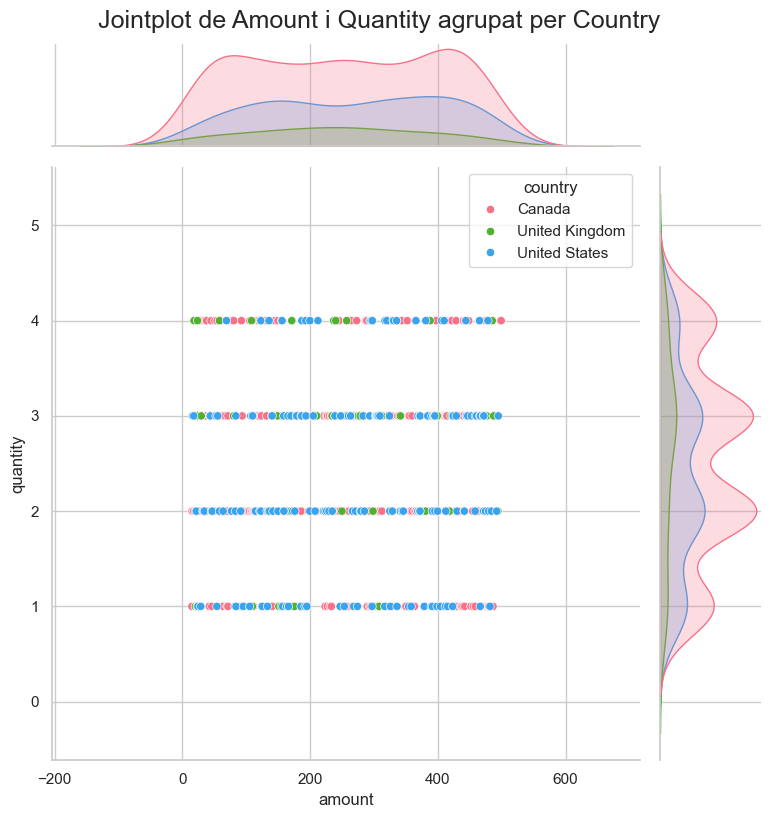

In [261]:
# Establir la connexió i obtenir les dades
conn = connection()

# Crear un objecte cursor per executar consultes SQL
cursor = conn.cursor()

# Consulta SQL per obtenir les dades necessàries
query = """
SELECT u.country, t.amount, COUNT(tp.product_id) AS quantity
FROM users u
JOIN transactions t ON t.user_id = u.id
JOIN transactions_products tp ON tp.transaction_id = t.id
GROUP BY u.country, t.amount;
"""

# Executar la consulta SQL
cursor.execute(query)

# Obtenir tots els resultats de la consulta
results = cursor.fetchall()

# Tancar el cursor i la connexió després d'obtenir els resultats
cursor.close()
conn.close()

# Convertir els resultats en un DataFrame de Pandas
df = pd.DataFrame(results, columns=['country', 'amount', 'quantity'])

# Convertir les columnes numèriques a tipus float/int per evitar errors
df['amount'] = df['amount'].astype(float)
df['quantity'] = df['quantity'].astype(int)

# Configurar el gràfic de Seaborn
plt.figure(figsize=(12, 8))

# Crear el jointplot amb les variables seleccionades
joint_plot = sns.jointplot(x='amount', y='quantity', data=df, kind='scatter', hue='country', height=8, ratio=5, palette='husl')

# Afegir títol
plt.suptitle('Jointplot de Amount i Quantity agrupat per Country', y=1.02, fontsize=18)

# Mostrar el gràfic
plt.show()


Interpretem el jointplot:



## NIVELL 3

## Exercici 1

**Implementa un violinplot combinat amb un altre tipus de gràfic**

/var/folders/bq/gwwghf997q74ydx2r6mhgd2h0000gp/T/ipykernel_40835/1433733496.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='country', y='quantity', data=df, palette='husl')
/var/folders/bq/gwwghf997q74ydx2r6mhgd2h0000gp/T/ipykernel_40835/1433733496.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='amount', data=df, estimator=sum, ci=None, palette='husl')
/var/folders/bq/gwwghf997q74ydx2r6mhgd2h0000gp/T/ipykernel_40835/1433733496.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='amount', data=df, estimator=sum, ci=None, palette='husl')


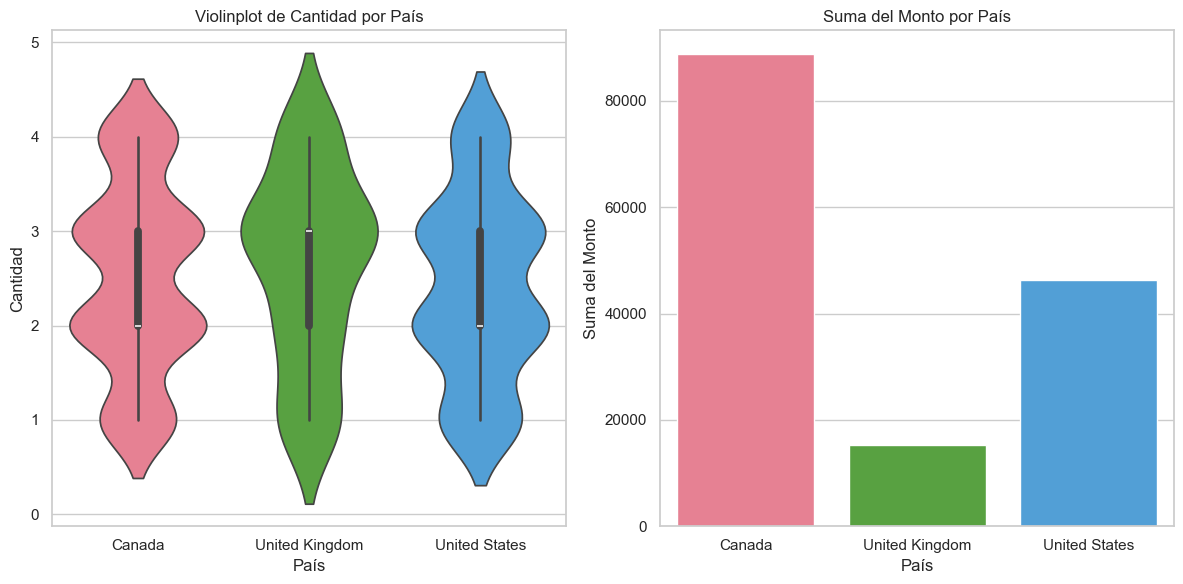

In [266]:
# Establir la connexió i obtenir les dades
conn = connection()

# Crear un objecte cursor per executar consultes SQL
cursor = conn.cursor()

# Consulta SQL per obtenir les dades necessàries
query = """
SELECT u.country, t.amount, COUNT(tp.product_id) AS quantity
FROM users u
JOIN transactions t ON t.user_id = u.id
JOIN transactions_products tp ON tp.transaction_id = t.id
GROUP BY u.country, t.amount;
"""

# Executar la consulta SQL
cursor.execute(query)

# Obtenir tots els resultats de la consulta
results = cursor.fetchall()

# Tancar el cursor i la connexió després d'obtenir els resultats
cursor.close()
conn.close()

# Convertir els resultats en un DataFrame de Pandas
df = pd.DataFrame(results, columns=['country', 'amount', 'quantity'])

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear un grid de subplots para combinar los gráficos
plt.subplot(1, 2, 1)  # Primer subplot para el Violinplot
sns.violinplot(x='country', y='quantity', data=df, palette='husl')
plt.title('Violinplot de Cantidad por País')
plt.xlabel('País')
plt.ylabel('Cantidad')

plt.subplot(1, 2, 2)  # Segundo subplot para el gráfico de barras
sns.barplot(x='country', y='amount', data=df, estimator=sum, ci=None, palette='husl')
plt.title('Suma del Monto por País')
plt.xlabel('País')
plt.ylabel('Suma del Monto')

# Ajustar el layout de los subplots
plt.tight_layout()

# Mostrar el gráfico combinado
plt.show()

## Exercici 2

**Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament**

<Figure size 1200x800 with 0 Axes>

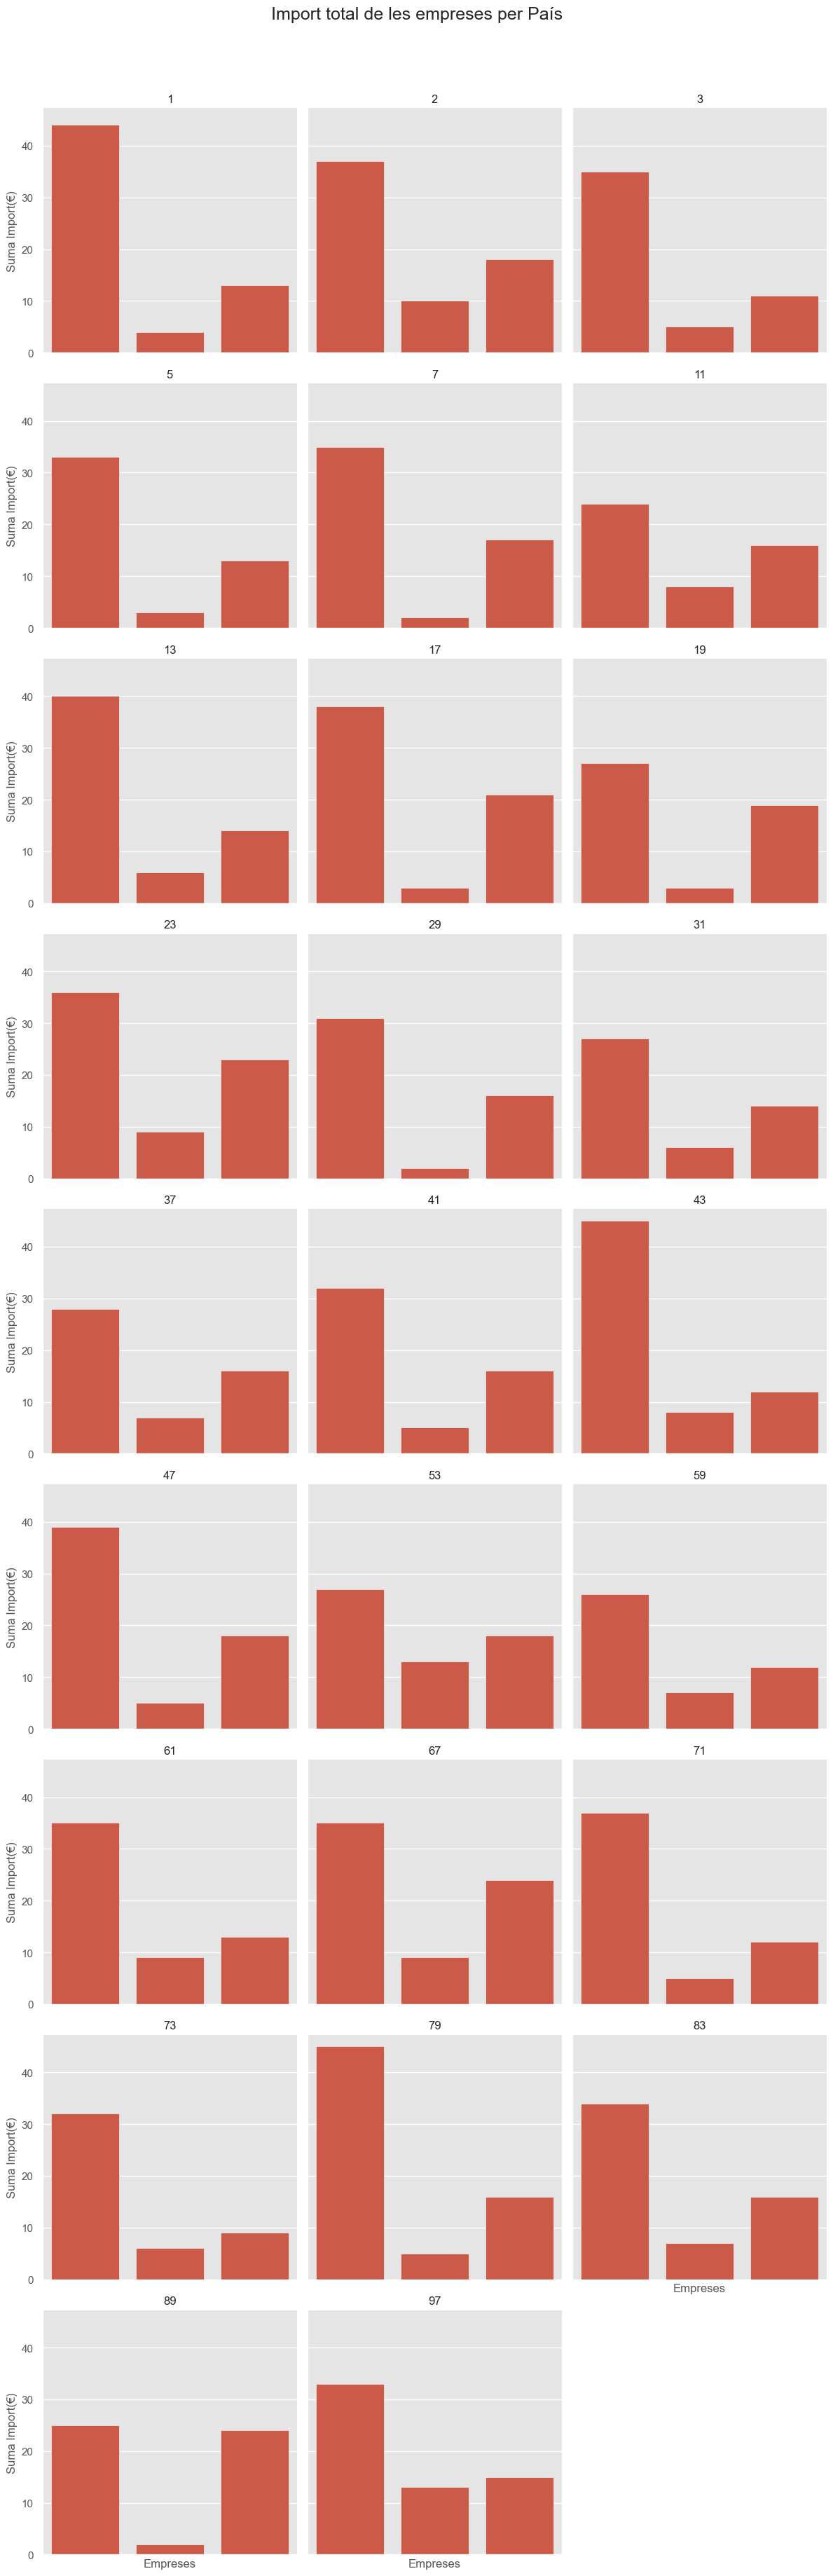

In [316]:


# Establir la connexió i obtenir les dades (assumint que `connection()` retorna la connexió)
conn = connection()
cursor = conn.cursor()

# Consulta SQL per obtenir les dades necessàries
query = """
SELECT tp.product_id, u.country, count(product_id) AS quantity 
FROM transactions_products tp
JOIN transactions t on t.id=tp.transaction_id
JOIN users u on u.id=t.user_id
GROUP BY product_id, u.country
"""

# Executar la consulta SQL
cursor.execute(query)

# Obtenir tots els resultats de la consulta
results = cursor.fetchall()

# Tancar el cursor i la connexió després d'obtenir els resultats
cursor.close()
conn.close()

# Convertir els resultats en un DataFrame de Pandas
df = pd.DataFrame(results, columns=['country', 'product_id', 'quantity'])

# Configurar la mida global de la figura
plt.figure(figsize=(12, 8))

# Configurar el gràfic de Seaborn
g = sns.FacetGrid(df, col='country', col_wrap=3, height=4)

# Mapejar el gràfic de barras per a cada subplot
g.map(sns.barplot, 'product_id', 'quantity', order=df['product_id'].unique())

# Ocultar els valors de l'eix x (company_id)
for ax in g.axes.flat:
    ax.set_xticks([])  # Ocultar ticks
    ax.set_xlabel('')  # Ocultar etiqueta de l'eix x

# Afegir títol als subplots
g.set_titles('{col_name}')

# Afegir títol general
g.fig.suptitle('Import total de les empreses per País', y=1.02, fontsize=18)

# Afegir etiquetes als eixos
g.set_axis_labels(x_var='Empreses', y_var='Suma Import(€)')

# Ajustar l'espai entre els subplots
plt.tight_layout()

# Ajustar l'espai entre els subplots
plt.tight_layout()

# Mostrar el gràfic
plt.show()



Els diferents colors identifiquen el país dels usuaris, tal i com es mostra en la llegenda situada al centre-dreta. Per interpretar el pairplot ho hem de fer la següent manera: els gràfics en diagonal mostren la distribució de cada variable individualment. Així doncs, el gràfic superior esquerre representa la mitjana de l'import dels tres països (tot i que per algun motiu la línia blava d'Estats Units no es visaulitza): Canadà amb una mitjana de 253,55€, Regne Unit 245,24€ i Estats Units la més alta amb 267,25€. El gràfic del centre mostra la distribució del pes, que ja havíem analitzat a l'exericic 1, però fent servir un gràfic de barres. Com s'observa, en agafar una mostra amb una grandària exactament igual per a cada país, la distribució del pes és molt similar entre els països. Hi ha dos pics per sota d'un kilo i pròxims al tres kilos. Tot i que Estats Units té un pic més baix en el primer i més alt en el segon. Tot i que la tendència és molt similar, sembla que Regne Unit prefereix productes de pes inferior i Estats Units superior. Per acabar amb la diagonal tenim el gràfic inferior dret amb la distribució de l'última variable, el preu. Aquí observem que els usuaris d'Estats Units, en proporció a la resta, trien de manera clara productes més cars. A més a més, trobem dos repunts en productes del voltant de 60€, fa una devallada en els de 110€ i torna a assolir el seu màxim prop del 170€. Pel que fa els usuaris de Regene Unit genera unes corbes més suaus, començant abans i assolint el primer pic als 30€ i a partir d'aquí va pujant més lleugerament fins als 140€. Pel que fa Canadà fa un primer pic passats els 50€ i el segon abans del 150€. La distribució d'aquest país és molt més compacta. Per acabar, podem concloure que hi ha més similitud entre els usuaris de Regne Unit i Canadà. Estats Units té un comportament de preus més diferenciat.

Passem a la resta dels gràfics, els que es mostren fora de la diagonal. Aquests ens ensenyen la relació entre dos variables:

* Relació mitjana de l'import i pes (gràfics superior-centre i centre-esquerra): no hi ha cap relació.

* Relació mitjana de l'import i preu (gràfics superior-dreta i inferior-esquerra): no hi ha cap relació.

* Relació pes i preu (gràfics centre-dreta i inferior-centre): no hi ha cap relació.


Els gràfics fora de la diagonal mostren la relació entre dues variables. Per exemple, el gràfic superior dret mostra la relació entre la factura total i la propina. Hi ha una correlació positiva entre aquestes dues variables, cosa que significa que els bitllets més grans tendeixen a tenir puntes més grans.


**Conclusió**

Les dades ens han mostrat que no hi ha cap correlació lineal evident entre aquestes tres variables. Pel que que un canvi en una de les variables no té perquè afectar l'altre. 
En definitiva, aquest resultat pot suggerir que la intereacció entre les variables sigui molt més complexa o es vegi afectada per altres factors que no hem considerat. Tot i que per mi la hipòtesi més plausible és que el nostre negoci disposa de poques dades per fer evidents aquest tipus de relacions. 
